# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane emerged as the most effective treatment regimens, exhibiting the lowest statistical values. Both regimens demonstrated the lowest mean, median, variance, and standard deviation among all treatments. The data points for Capomulin and Ramicane were notably closer to the mean compared to other regimens, indicating that mice treated with these regimens experienced smaller tumor sizes.

Moreover, Capomulin and Ramicane had the highest frequency of recorded timepoints, indicating that mice undergoing these treatments were observed for the longest duration. This prolonged observation period suggests that, despite tumor volume increases, the weight of the mice also increased. This observation implies that the disease did not lead to a significant loss of weight in the mice treated with Capomulin and Ramicane.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Use pd.merge(dataset_name, dataset_name1, how="join_type", on["col_name", "col_name"])
mouse_study_results = pd.merge(mouse_metadata, study_results, how="left",on=["Mouse ID","Mouse ID"])


# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
# 249
mice_count = len(mouse_study_results["Mouse ID"].unique())
mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#array(['g989'], dtype=object)
duplicate_mice = mouse_study_results[mouse_study_results.duplicated(["Mouse ID", "Timepoint"], keep=False)]

#Extract unique Mouse IDs from the duplicate entires 
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989"]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_results[mouse_study_results['Mouse ID'].isin(duplicate_mice_ids)==False]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
# 248
clean_mice_count = len(clean_mouse_data["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = clean_mouse_data.groupby(['Drug Regimen'])
summary_stats_df.head()

#Calc the mean of tumor volume 
mean_tumor_volume = summary_stats_df['Tumor Volume (mm3)'].mean()

#Calc the median of tumor volume 
median_tumor_volume = summary_stats_df['Tumor Volume (mm3)'].median()

#Calc the variance of tumor volume 
variance_tumor_volume = summary_stats_df['Tumor Volume (mm3)'].var()

#Calc the standard deviation of tumor volume 
stand_deviation_tumor_volume =  summary_stats_df['Tumor Volume (mm3)'].std()

#Calc the standard of errors for each Drug Regimen- SEM 
soe_tumor_volume = summary_stats_df['Tumor Volume (mm3)'].sem()

#Create into a single dataframe & rename the series header 

summary_results_df = pd.DataFrame({
    'Mean Tumor Volume' : mean_tumor_volume,
    'Median Tumor Volume' : median_tumor_volume,
    'Tumor Volume Variance' : variance_tumor_volume,
    'Tumor Volume Std. Dev.' : stand_deviation_tumor_volume,
    'Tumor Volume Std. Err.' : soe_tumor_volume
})

summary_results_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_results = clean_mouse_data[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])
summary_results

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regiment on # of Mice'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

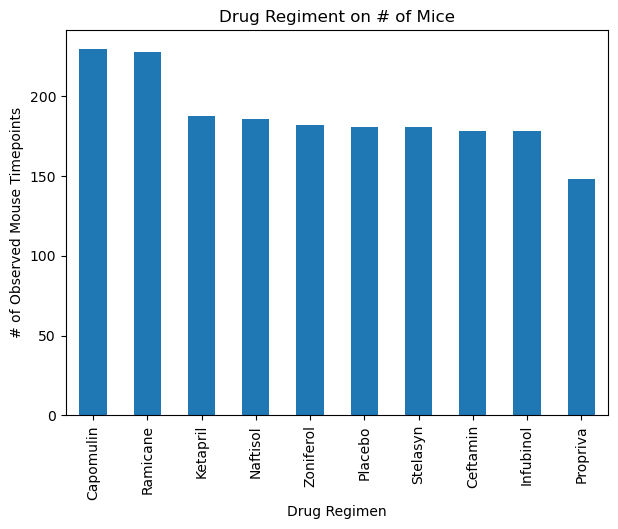

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_summary_stats = clean_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']
bar_summary_stats = bar_summary_stats.sort_values(ascending=False)

x_label = "Drug Regimen"
y_label = "# of Observed Mouse Timepoints"
bar_title = "Regimen over Mice"

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Drug Regiment on # of Mice')

bar_summary_stats.plot.bar(bar_title, y='Number of Mice', figsize=(7,5))


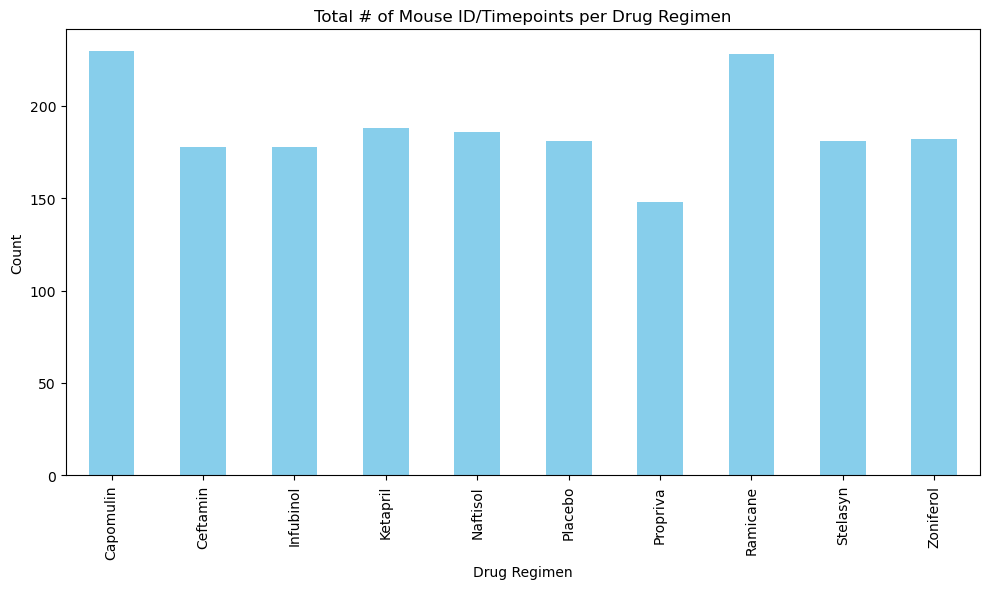

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

bar_summary_statistics = clean_mouse_data['Mouse ID'].groupby(clean_mouse_data['Drug Regimen']).count()

# Create a bar plot 
plt.figure(figsize=(10,6))
bar_summary_statistics.plot(kind='bar', color='skyblue')
plt.title('Total # of Mouse ID/Timepoints per Drug Regimen')

plt.xlabel('Drug Regimen')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


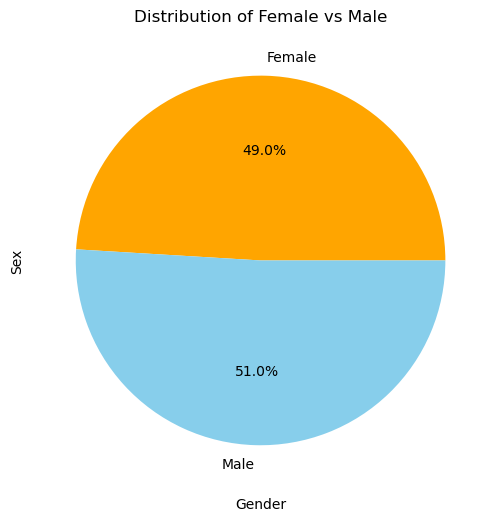

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_comparison = clean_mouse_data['Mouse ID'].groupby(clean_mouse_data['Sex']).count()

# Create a pie plot 
plt.figure(figsize=(6,6))
gender_comparison.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('Distribution of Female vs Male')
plt.ylabel('Sex')
plt.xlabel('Gender')

plt.show()

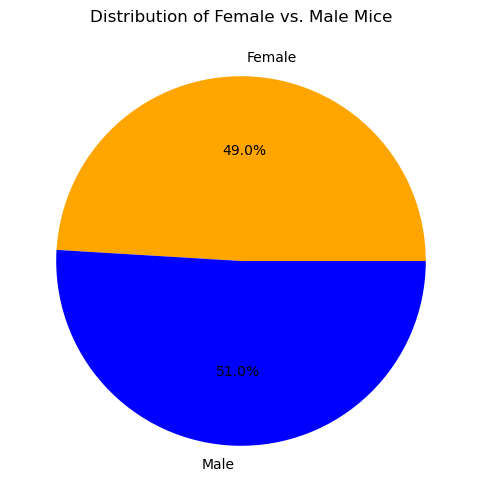

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distro = clean_mouse_data['Mouse ID'].groupby(clean_mouse_data['Sex']).count()

# Create a pie plot 
plt.figure(figsize=(6,6))
plt.pie(gender_distro, labels=gender_distro.index, autopct='%1.1f%%', colors=['orange', 'blue'])
#plt.pie(gender_distro, lables = gender_distro.index, autopct = '%1.1f%%', colors=['orange', 'blue'])
plt.title('Distribution of Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_data.groupby(['Mouse ID'])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_lasttp = last_timepoint.merge(clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")
merged_data_lasttp

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_mm3 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_mm3.append(tumor_volume)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}\'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


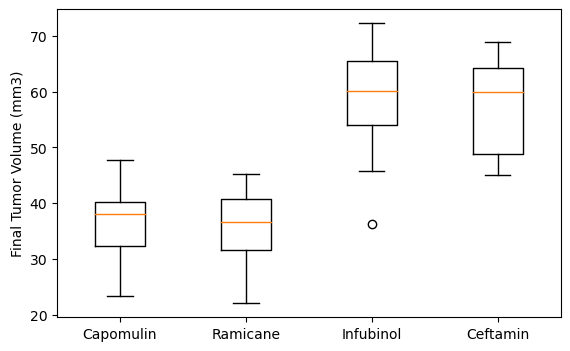

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
figl, axl = plt.subplots(figsize=(6.5,4))
axl.set_ylabel('Final Tumor Volume (mm3)', fontsize = 10)
axl.boxplot(tumor_volume_mm3, labels=drugs, widths = 0.4, vert=True)

plt.show()

## Line and Scatter Plots

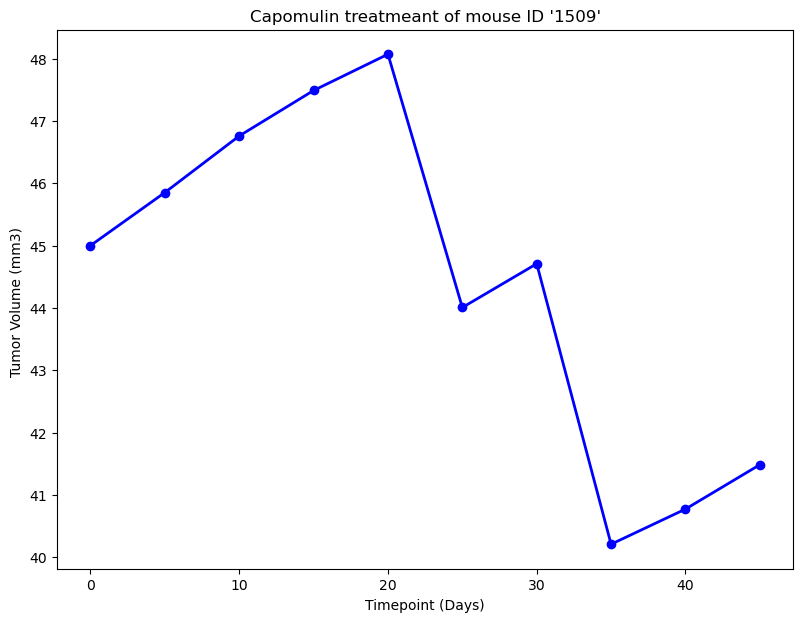

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Get the data for specific test subject (Mouse ID = l509)
capomulin_subject = capomulin.loc[capomulin['Mouse ID'] == 'l509', :]

# add the parameters 
x_axis = capomulin_subject['Timepoint']
tumor_volume = capomulin_subject["Tumor Volume (mm3)"]

fig, ax = plt.subplots(figsize=(9.5,7 ))
plt.title("Capomulin treatmeant of mouse ID 'l509'")
plt.plot(x_axis, tumor_volume, marker='o', color='blue', linewidth=2, label="mm3")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3) ")

plt.show()


          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128            22.0           41.963636
b742            21.0           40.083699
f966            17.0           36.505973
g288            19.0           41.990097
g316            22.0           44.613344
i557            24.0           44.805810
i738            20.0           39.141053
j119            23.0           44.465236
j246            21.0           43.216925
l509            21.0           44.434474
l897            19.0           42.507261
m601            17.0           34.847470
m957            19.0           39.049816
r157            25.0           45.798970
r554            17.0           36.509212
r944            25.0           43.367364
s185            17.0           34.559143
s710            23.0           42.803733
t565            17.0           39.328725
u364            17.0           39.887495
v923            21.0           41.581595
w150            23.0           41.384825
w914            

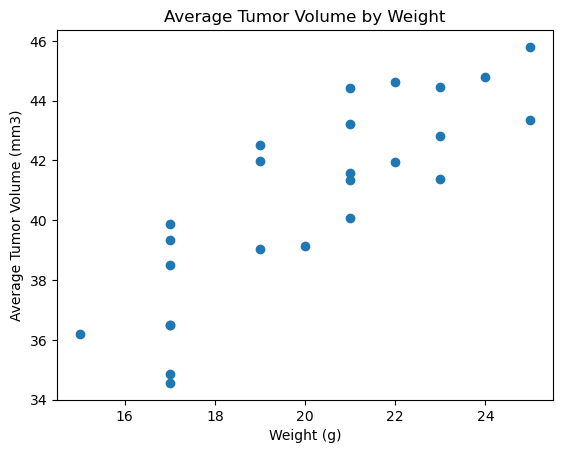

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_vol = capomulin.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

# merge average tumor volume onto capomulin & drop duplicates
#avg_vol = pd.merge(capomulin, avg_vol, on='Mouse ID')

print(avg_vol)
#final_avg_vol = avg_vol['Weight (g)','Tumor Volume (mm3)'].drop_duplicates()
x = avg_vol['Weight (g)']
y = avg_vol['Tumor Volume (mm3)']

#create a scatter plot based on new final_avg_vol
plt.scatter(x,y)

#add the labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

In [78]:
x = clean_mouse_data['Weight (g)'] 
x

0       16
1       16
2       16
3       16
4       16
        ..
1888    30
1889    30
1890    30
1891    30
1892    30
Name: Weight (g), Length: 1880, dtype: int64

In [72]:
y = clean_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
y

Mouse ID
a203    56.312708
a251    55.237095
a262    58.611631
a275    52.770965
a366    54.639906
          ...    
z435    46.942214
z578    38.411510
z581    53.979584
z795    54.880317
z969    60.194652
Name: Tumor Volume (mm3), Length: 248, dtype: float64

The correlation between mouse weight and the average tumor volume on the Capomulin regimen is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07).


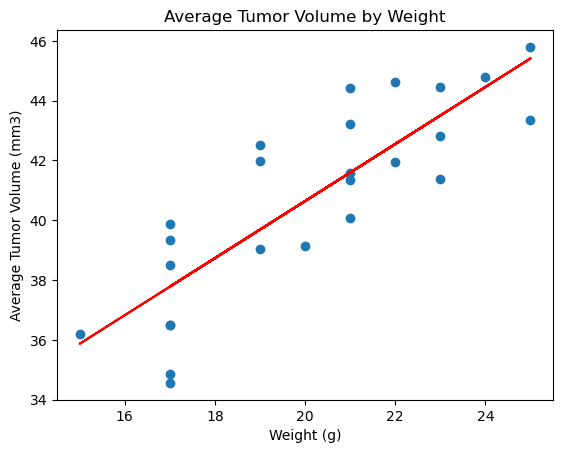

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#x = clean_mouse_data['Weight (g)']  # Mouse weight
#y = clean_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean() # Average tumor volume

x = avg_vol['Weight (g)']
y = avg_vol['Tumor Volume (mm3)']


#print the correlation coefficient 
correlation_coefficient = st.pearsonr(x,y)

print(f"The correlation between mouse weight and the average tumor volume on the Capomulin regimen is {round(correlation_coefficient,2)}.")
      
#cal the linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
regress_values = x * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot linear regression on top of scatter plot 
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
      
# add labels & title to plot 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')




# show the plot 
plt.show()

In [81]:
correlation_coefficient = st.pearsonr(x,y)
correlation_coefficient

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)